# House Price Prediction using Linear Regression


In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [7]:
data= pd.read_csv("housedata.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

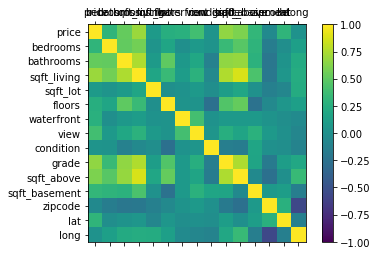

In [12]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

convert nominal and ordinal features into category.

In [20]:
data['waterfront'] = data['waterfront'].astype('category', True)
data['view'] = data['view'].astype('category',True)
data['condition'] = data['condition'].astype('category',True)
data['grade'] = data['grade'].astype('category',False)
data['zipcode'] = data['zipcode'].astype('category',False)

In [21]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [22]:
data=data[data['bedrooms'] < 10]

In [23]:
data=data[data['bathrooms']<8]

In [24]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Building a model with top 5 parameters

In [25]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [26]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [27]:
y=data['price']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.8,random_state=42)

In [30]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
17607,4,2.00,1880,1880,0,0,0,0,0,1,0,0,0,0,0
13686,3,2.50,1410,1410,0,0,0,0,1,0,0,0,0,0,0
20842,3,2.25,1230,1080,0,0,0,0,0,1,0,0,0,0,0
5831,4,2.75,4430,4430,0,0,0,0,0,0,0,1,0,0,0
19520,3,1.00,1270,910,0,0,0,0,1,0,0,0,0,0,0


In [31]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-2.26560556e+04 -6.68288152e+03  2.33844701e+02 -1.02145274e+02
  1.19829233e+05 -4.20372885e+03  9.58152112e+04  9.80582858e+04
  1.32995446e+05  2.17966382e+05  3.61408010e+05  5.45139094e+05
  9.27514245e+05  1.02976496e+06  1.56009390e+06]


In [33]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))

56115329215.05717


In [34]:
reg.score(x_test,y_test)

0.5817087500670086

In [36]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [45]:
y=data['price']
df.head()
#df= df.drop(['date','id','price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.8,random_state=42)

In [46]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print('Coefficients: \n', reg.coef_)


Coefficients: 
 [-6.33472002e+03  1.95519752e+04  8.84317451e+01  1.63370885e-01
 -2.64767434e+04  7.43043386e+01  1.41302502e+01 -3.56647303e+02
  2.13962840e+01  1.55004471e+05 -1.55535286e+05  4.09382115e+00
 -1.79752702e-01  4.94986806e+05  1.09572854e+05  6.92534672e+04
  1.89673332e+05  3.53096317e+05  1.22292157e+05  1.58022703e+05
  1.82812237e+05  2.38729367e+05  1.68857157e+04 -1.31884349e+05
 -1.54950274e+05 -1.73978179e+05 -1.61642835e+05 -1.34835295e+05
 -5.81335364e+04  5.71596730e+04  3.14347418e+05  4.80217212e+05
  9.72859208e+05  3.65448961e+04  5.90721370e+03  6.83924356e+05
  2.86639855e+05  2.44206353e+05  2.37155267e+05  2.65012895e+05
  1.35648959e+05  9.63037652e+04  1.55568884e+05  9.39836428e+04
  6.96134467e+04 -3.26048738e+04  1.81118103e+05  1.79922540e+05
  6.84720145e+04  2.49762903e+05  3.43290442e+04  3.84765068e+04
 -7.67023375e+03  3.19307844e+05  1.60457167e+05  8.11378374e+04
  1.05119996e+06  5.15834790e+05  2.45141179e+04  1.54618369e+05
  2.36502

In [51]:
print('Mean Square Error')
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('R-square:')
print(reg.score(x_test,y_test))

Mean Square Error
23314550203.99697
R-square:
0.8262101909964632
